# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

In [3]:
from sklearn.tree import DecisionTreeRegressor

y_real = f(linspace)

In [4]:
def gen_Xy(size):
    X = np.random.exponential(size=size).reshape((size, 1))
    y = f(X) + np.random.uniform(low=-1, high=1, size=size).reshape((size, 1))
    return X, y

In [5]:
def build(index, max_depth=None):
    X, y = gen_Xy(sample_size)
    tree = DecisionTreeRegressor(max_depth=max_depth).fit(X, y)
    y_pred = tree.predict(linspace.reshape((len(linspace), 1)))
    plt.plot(linspace, y_pred, label=f'Predicted {index}', color="gray", alpha=0.5)
    return y_pred

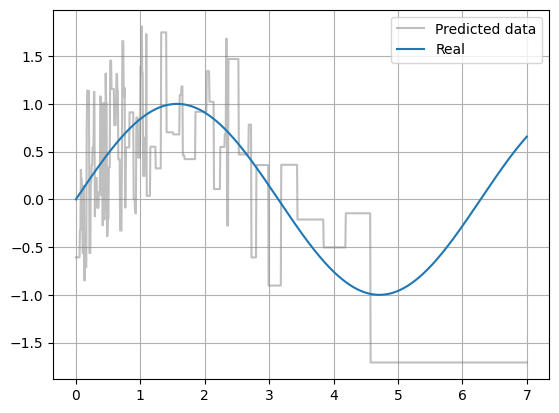

In [6]:
build('data')

plt.plot(linspace, y_real, label='Real')

plt.xlabel = "X"
plt.ylabel = "Y"

plt.grid()
plt.legend()

plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

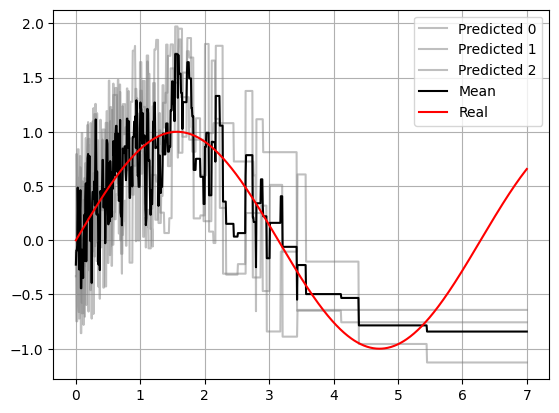

In [7]:
def depth(max_depth=None, num_iters=3):

    mean = np.zeros(linspace.shape)

    for i in range(num_iters):
        mean += build(i, max_depth=max_depth)
    
    plt.plot(linspace, mean / num_iters, label='Mean', color='black')
    plt.plot(linspace, y_real, label='Real', color='red')

    plt.xlabel = "X"
    plt.ylabel = "Y"

    plt.grid()
    plt.legend()

    plt.show()


depth()

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

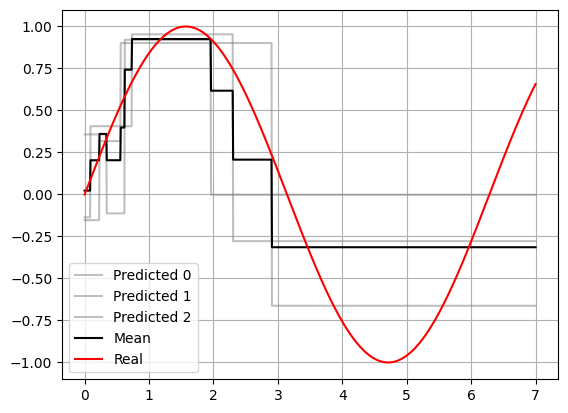

In [8]:
depth(max_depth=2)

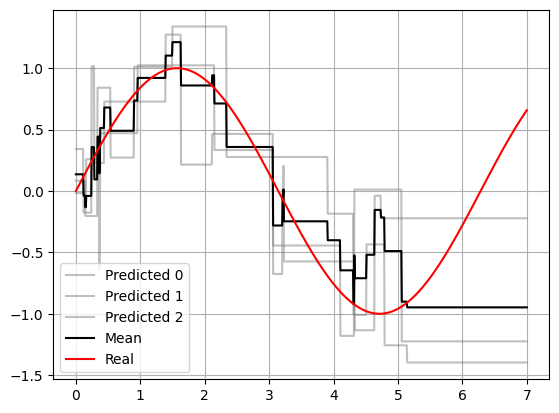

In [9]:
depth(max_depth=4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:** смещение близко к нулю в слчае отсутствия ограничений

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [11]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/home/semen/Development/aescml/task7_dstree_practice/hw3code.py'>

In [12]:
target = ' UNS'

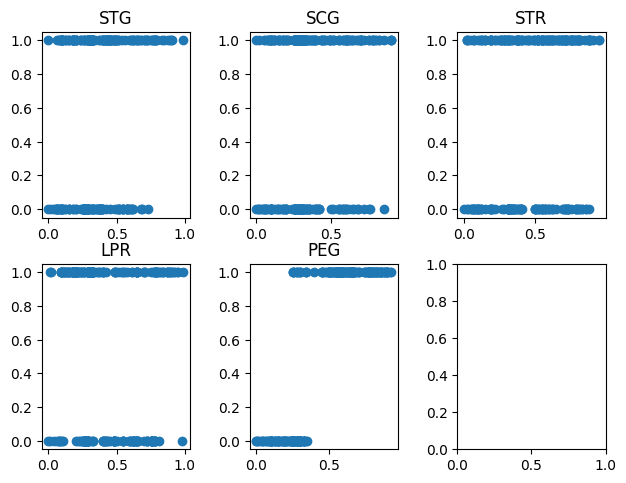

In [13]:
f, ax = plt.subplots(2, 3)

f.tight_layout(pad=1.2)

ind = 0
for column in data.columns:
    if column == target: continue
    ax[ind // 3][ind % 3].scatter(data[column], data[target])
    ax[ind // 3][ind % 3].set_title(column)
    ind += 1


In [14]:
def paint(column_name, target_column):

    x, y, best_x, best_y = hw3code.find_best_split(data[column_name].to_numpy().astype(dtype=float),
                                                   data[target_column].to_numpy().astype(dtype=float))
    plt.plot(x, y, label=column_name)

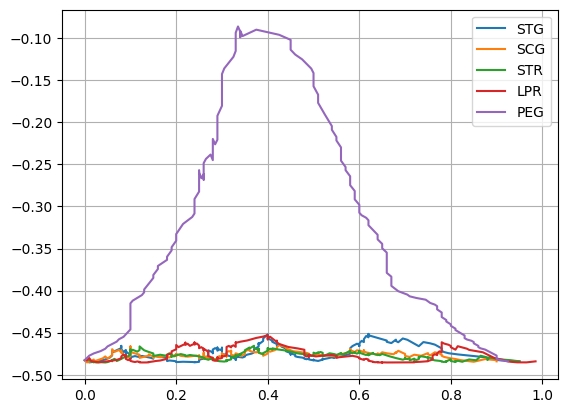

In [15]:
for column in data.columns:
    if column == target: continue
    paint(column, target)

plt.xlabel = "Threshold"
plt.ylabel = "Gini"

plt.grid()
plt.legend()

plt.show()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ**: исходя из значений критерия Джини, разделение следует проводить по критерию `PEG`. То же самое мы можем наблюдать и на scatter-графиках, где между `PEG` и `UNS` явно имеется корреляция.

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("msh.csv")

enc = LabelEncoder()

for column in data.columns:
    data[column] = enc.fit_transform(data[column])

In [17]:
table = data.to_numpy().astype(dtype=int)
X, y = table[:, 1:], table[:, 0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [19]:
tree = hw3code.DecisionTree(feature_types=["real" for _ in range(X.shape[1])])
tree.fit(X_train, y_train)

In [20]:
y_pred = tree.predict(X_test)

print("Точность предсказания:", len(y_test[y_pred == y_test]) / len(y_test))

Точность предсказания: 1.0


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [21]:
data = pd.read_csv("train.csv")
real_columns = []
for column in data.columns:
    if data[column].dtype != object:
        real_columns.append(column)

data = data[real_columns]
data = data[:10000]
data[data.isna()] = 0

In [22]:
target = 'target'

In [23]:
X, y = data.drop(columns=[target]).to_numpy().astype(dtype=float), data[target].to_numpy().astype(dtype=float)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [26]:
print(f"Tree: {cross_val_score(DecisionTreeClassifier(), X, y, cv=3)}",
      f"Bagging: {cross_val_score(BaggingClassifier(), X, y, cv=3)}",
      f"Forest: {cross_val_score(RandomForestClassifier(), X, y, cv=3)}",
      sep='\n')

Tree: [0.44691062 0.66186619 0.69306931]
Bagging: [0.5059988  0.71887189 0.7359736 ]
Forest: [0.67336533 0.75247525 0.75637564]


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

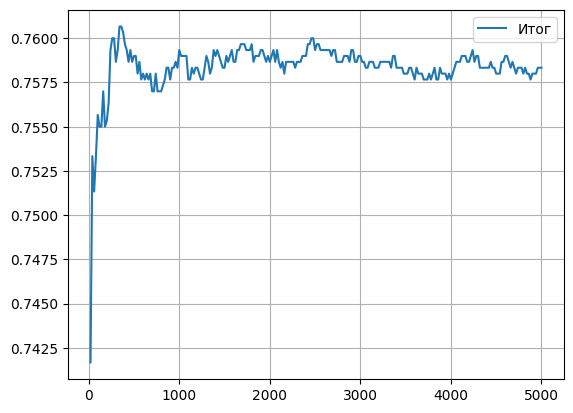

In [217]:
tree = RandomForestClassifier(warm_start=True)

xs = [ i for i in range(20, 5001, 20) ]
ys = []

for x in xs:
    tree.set_params(n_estimators=x)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    ys.append(len(y_test[y_pred == y_test]) / len(y_test))
    print(x)

plt.plot(xs, ys, label='Итог')
plt.xlabel = 'Кол-во деревьев'
plt.ylabel = 'Точность'

plt.grid()
plt.legend()

plt.show()

**Вывод**: случайный лес не склонен к переобучению, т.к. установившаяся точность не падает с течением времени